# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/chongtingho/Documents/Udacity/CarND/P2/traffic-signs-data/train.p'
validation_file= '/Users/chongtingho/Documents/Udacity/CarND/P2/traffic-signs-data/valid.p'
testing_file = '/Users/chongtingho/Documents/Udacity/CarND/P2/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
# Import pandas for further data exploration of the signnames.csv file 
import pandas as pd
sign_name = pd.read_csv("signnames.csv")

# Examine all SignName of the csv file
sign_name.head

<bound method NDFrame.head of     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14              

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### 1.1 Plotting traffic sign images

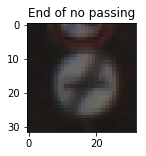

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

n = 0 # Image number
image = X_train[n] # Get the image
label = y_train[n] # Get the label

fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(image)
ax.set_title(sign_name.values[label][1], fontsize=12)

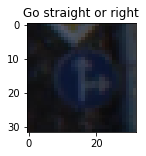

In [5]:
n = 1000 # Image number
image = X_train[n] # Get the image
label = y_train[n] # Get the label
fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(image)
ax.set_title(sign_name.values[label][1], fontsize=12)

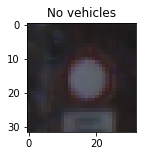

In [6]:
n = 30000 # Image number
image = X_train[n] # Get the image
label = y_train[n] # Get the label
fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(image)
ax.set_title(sign_name.values[label][1], fontsize=12)

### 1.2 Plotting Random Image Samples

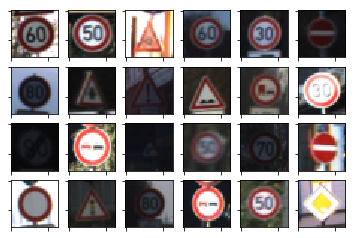

In [7]:
# Random Sampling the images
idx = np.arange(y_train.shape[0]) # Create an index
np.random.shuffle(idx) # Shuffle the index

# Creating subplots
fig, xaxis = plt.subplots(4,6)
for i in range(4):
    for j in range(6):
        xaxis[i,j].imshow(X_train[idx[j+10*i]])
        # Making xlabel invisible
        plt.setp(xaxis[i, j].get_xticklabels(), visible=False)        
        plt.setp(xaxis[i, j].get_yticklabels(), visible=False)
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### 2.1 Pre-process the data

### 2.1.1 Convert Color Image to Gray Scale

In [8]:
from sklearn.preprocessing import MinMaxScaler
import cv2

# Normalize data
def to_grayscale(x):
    nx = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x])
    return nx

# Convert training data to gray scale
X_train_gry = to_grayscale(X_train)

# Convert testing data to gray scale
X_test_gry = to_grayscale(X_test)

Image size: (32, 32)


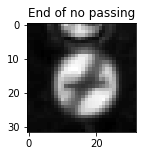

In [9]:
# Check the gray image
image = X_train_gry[0] # Get the first image 
label = y_train[0] # Get the label of the first image
print("Image size:",image.shape)

fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image,cmap='gray')
ax.set_title(sign_name.values[label][1], fontsize=12)

### 2.1.2 Flatten the Image

In [10]:
def flatten_dataset(x):
    num_img = x.shape[0] # Number of image
    print("Number of images:",num_img)

    num_pix = x.shape[1]*x.shape[2] # Number of pixels in an image
    print("Number of pixels in one image:",num_pix)
    
    # Flatten the image
    x_flat = np.reshape(x,[num_img,num_pix])
    return x_flat

In [11]:
# Convert training set
print("Training set:")
X_train_gry_flat = flatten_dataset(X_train_gry)

# Convert testing set
print("\nTest set:")
X_test_gry_flat = flatten_dataset(X_test_gry)

Training set:
Number of images: 34799
Number of pixels in one image: 1024

Test set:
Number of images: 12630
Number of pixels in one image: 1024


In [12]:
# Check if it's done correctly
print("Flattened:")
print(X_train_gry_flat[0])

print("\nOriginal:") 
print(X_train_gry[0])

Flattened:
[25 24 24 ..., 24 23 22]

Original:
[[25 24 24 ..., 27 27 27]
 [26 25 25 ..., 27 27 27]
 [26 25 25 ..., 27 27 27]
 ..., 
 [24 25 25 ..., 24 24 25]
 [24 25 25 ..., 24 24 24]
 [24 25 25 ..., 24 23 22]]


### 2.1.3 One-hot encoding

In [13]:
# Convert the label data to one-hot encoding
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode(y): 
    enc = LabelBinarizer() # Encoder
    enc.fit(y) # Fit encoder
    y_1hot = enc.transform(y) # Convert lable data
    return y_1hot

In [14]:
# Convert training set labels
y_train_1hot = one_hot_encode(y_train)

# Convert test set labels
y_test_1hot = one_hot_encode(y_test)

In [15]:
# Check if it's done correctly
print('Training set labels:')
print(y_train_1hot)

Training set labels:
[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


### 2.2 Model Architecture

### 2.2.1 Set up Tensorflow

Initialize parameters

In [1]:
import tensorflow as tf
# Initialize parameters
img_size = 32 # Image pixels in each dimension
img_size_flat = img_size * img_size # Images are stored in one-dimensional arrays
img_shape = (img_size, img_size) # Tuple with height and width of images
num_channels = 1 # Number of color channels
num_classes = 43 # Number of classes
if_use_pool = True

### 2.2.2 Define Functions of Hyper-Parameters

#### 2.2.2.1 CNN Weights

In [ ]:
# Define function of CNN weights
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

#### 2.2.2.2 CNN Biases

In [3]:
# Define function of CNN biases
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

### 2.2.3 Create Convolution Layer

In [4]:
# Create Convolution layer 
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Number of channels in previous layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling = if_use_pool):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the convolution layer.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    layer = tf.nn.relu(layer)
    
    # Return both the resulting layer and the filter-weights
    return layer, weights

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [6]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 